# Breast Cancer Dataset Classification

## University of Toronto | Project by Riyan Roy

**Data Processing and Illumination**

Embark on a journey where data preprocessing becomes an art, paving the way for the illumination of insights. Preprocessing data (includes standardization) helps in creating more effective and accurate model predictions.

**Visual Exploration and Analysis**

Experience the blend of exploratory data visualization and analysis, unraveling intricate patterns within the dataset. I created insights and visualize relations between features to understand the data in depth.

**Algorithmic Insights: K Neighbours and Decision Tree**

Enter the realm of machine learning, where K Neighbours and Decision Trees decode data patterns, contributing to a efficient predictive analytics.

**Feature Selection: The Art of Choice**

Delve into strategic feature selection, where I removed least important features and created models using most important features using different data driven methodolgies. 
**Testing Grounds: Rigorous Evaluation**
The best model is used to predict the outcomes(Class 0 for negative /Class 1 for positive) at the end of the notebook.

**Authored by Riyan Roy**

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? **30**
* How many observations have a 'mean area' of greater than 700? **171**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

In [2]:
# Part 1: Q1 Loading target dataset into a pandas dataframe with the name of the dataframe as **target_data**
target_data = pd.DataFrame(data=dataset.target)

In [3]:
# Part 1: Q1 continued - loading values/rows containing "data" and combining it with target_data.  
data_feed = pd.DataFrame(data=dataset.data,columns=dataset.feature_names).join(target_data)

In [4]:
# Part 1: Q1 continued - renaming the fetaure which contains the target data and assigning it to the data frame with the name **df**
df = data_feed.rename(columns={0:"target"})

In [5]:
# Display df
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
# Part 1: Question 2 - To find out the number of features in the pandas dataset: df
(dataset.feature_names).shape

(30,)

In [7]:
# Part 1: Question 3 - Number of observations have a 'mean area' of greater than 700
mean_area_700 = df.loc[df["mean area"] > 700]
# Using both the len function to determine the number of observations with mean area greater than 700 
print("The number of observations having mean area greater than 700 =", len(mean_area_700["mean area"]))

The number of observations having mean area greater than 700 = 171


In [8]:
# Part 1: Question 4  - Number of participants tested Malignant
# Here, the the target data having value = 0 is considered as a patient who got tested malignant. For target data = 1, the patients got tested as benign
number_of_malignant = df.loc[df["target"] == 0]
print("The number of patients tested malignant", number_of_malignant["target"].value_counts())

The number of patients tested malignant 0    212
Name: target, dtype: int64


In [9]:
# Part 1: Question 5  - Number of participants tested Benign
number_of_benign = df.loc[df["target"] == 1]
print("The number of patients tested benign",number_of_benign["target"].value_counts())

The number of patients tested benign 1    357
Name: target, dtype: int64


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [10]:
### Splitting the dataset into training set and test set. The training set size is set to 70% of the total data  ###
x_data = dataset.data
y_data = df["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




In [11]:
### YOUR CODE HERE ###
import seaborn as sns

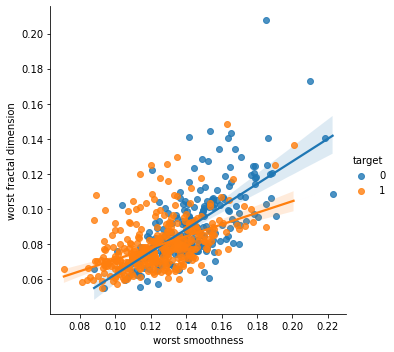

In [12]:
plot_data_without_standardization = sns.lmplot(x="worst smoothness",y="worst fractal dimension",data=df,hue="target")     # Plotting non-standardized data using seaborn package 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

standardize_fract_dimension = df["worst fractal dimension"].to_numpy()
standardize_radius = df["worst radius"].to_numpy()
standardize_fract_dimension = standardize_fract_dimension.reshape(-1,1)
standardize_radius = standardize_radius.reshape(-1,1)

scale_1 = scaler.fit(standardize_fract_dimension)
scale_2 = scaler.fit(standardize_radius)

y_std_WFD = scaler.transform(standardize_fract_dimension)
y_std_WR = scaler.transform(standardize_radius)

In [15]:
df_copy_with_std = df.copy()

In [16]:
df_copy_with_std["worst fractal dimension"] = y_std_WFD
df_copy_with_std["worst radius"] = y_std_WR

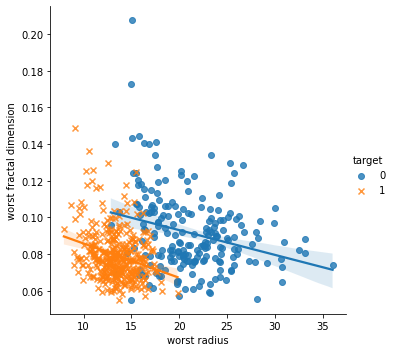

In [17]:
plot_train_data = sns.lmplot(x="worst radius",y="worst fractal dimension",data=df,hue="target",markers=["o","x"])     # Plotting non-standardized data

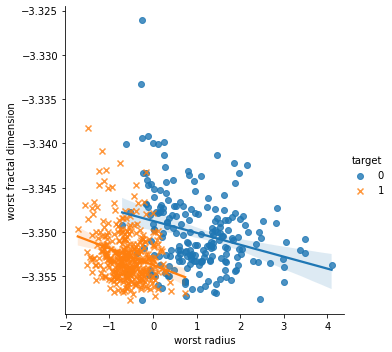

In [18]:
import seaborn as sns
plot_train_data_std = sns.lmplot(x="worst radius",y="worst fractal dimension",data=df_copy_with_std,hue="target",markers=["o","x"])     # Plotting standardized data after fitting and trasnforming using StandardScaler()

**PART 1: Continued** 

The scale gets uniform after standardization (constant variance and zero mean).
Since we are subtracting the mean and dividing the data with standard deviation, the data points get standardized, however the plot doesn't change (It is the scale which is getting adjusted).


It gives more clarity to draw clear conclusions about the current data when we have other data to measure it against. 

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [19]:
### Part 2: Question 1 - Training a KNN classifier using cross validation on the dataset from k=1 to 100 ###
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

cv_scores_train = []    # Creating empty list for the scores obtained from the model on the training set.
cv_scores_val_test = [] # Creating empty list for the scores obtained from the model on the validation set. 
k_values = []           # Creating empty list for capturing the k values from 0 to 100

for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  cv_scores = cross_validate(knn,X_train,Y_train,cv=5,return_train_score=True)
  cv_scores_train = np.append(cv_scores_train,(cv_scores['train_score'].mean()*100))      # Assigning the mean accuracy/score (for training set) to the list cv_score_train  
  cv_scores_val_test = np.append(cv_scores_val_test,(cv_scores['test_score'].mean()*100)) # Assigning the mean cross validation score (validation set) to the list cv_score_val_test
  k_values = np.append(k_values,i)

The maximum cv accuracy is obtained for k = 10 where the maximum validation accuracy = 93.465190  %


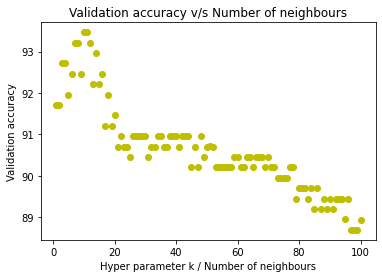

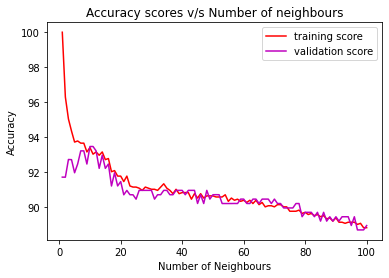

In [20]:
### Part 2: Question 1 continued - Plotting the mean cross validation accuracy/score v/s hyper parameter k ###
import matplotlib.pyplot as plt

# Creating scatter plot for plotting mean cross validation accuracy against hyperparameter k
plt.figure('Validation accuracy')
plt.scatter(k_values,cv_scores_val_test,color='y')
plt.title("Validation accuracy v/s Number of neighbours")
plt.xlabel("Hyper parameter k / Number of neighbours")
plt.ylabel("Validation accuracy")

### Part 2: Question 2 - Calculating the best k value and the respective cross validation accuracy ###
max_cv_accuracy = cv_scores_val_test.max()
index_value = np.where(cv_scores_val_test == max_cv_accuracy)
print("The maximum cv accuracy is obtained for k = %d where the maximum validation accuracy = %f "%(index_value[0][1],max_cv_accuracy),"%")

### Part 2: Question 3 - Commenting on ranges of k which leads to undefitted and overfitted models
# Creating linear plot for plotting accuracy scores against hyperparameter k
plt.figure("Accuracy scores v/s Number of neighbours")
plt.title("Accuracy scores v/s Number of neighbours")
plt.plot(k_values,cv_scores_train,label='training score',color = 'r')
plt.plot(k_values,cv_scores_val_test,label='validation score',color='m')
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend() 

In [21]:
cv_scores_train[80:100]

array([89.57295795, 89.63565387, 89.51006486, 89.57276079, 89.44717178,
       89.50986771, 89.32138562, 89.3842787 , 89.19579661, 89.3842787 ,
       89.13290353, 89.13290353, 89.07020761, 89.13310069, 89.13310069,
       89.13329785, 89.00770884, 89.07040476, 88.81942391, 88.81942391])

In [22]:
cv_scores_val_test[80:100]

array([89.69936709, 89.69936709, 89.44936709, 89.69936709, 89.19620253,
       89.69936709, 89.19620253, 89.44620253, 89.19620253, 89.44620253,
       89.19620253, 89.44620253, 89.44620253, 89.44620253, 88.94620253,
       89.44620253, 88.69303797, 88.69303797, 88.69303797, 88.94303797])

### Part 2: Question 3 continued - Commenting on ranges of k which leads to undefitted and overfitted models

From the graph, for k values less than 10 (k < 10), the model is underfit due to the huge variation between training and validation accuracy.
However, for large k values (k > 80), the model is overfit

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [23]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()              # Calling Decision tree classifier

X_train_copy = X_train.copy()
Y_train_copy = Y_train.copy()

# Part 3: Question 1-Fitting the classifier on the training set
dt.fit(X_train_copy,Y_train_copy)               

DecisionTreeClassifier()

In [24]:
def Feature_selector (X_train_copy, Y_train_copy , tr=0.95):
  global mean_cvs_train,mean_cvs_val,corresponding_hyperparameter,k,f_data,least_imp_features_removed,best_mean_cvs, importance # Keyword to modify the variables outside the defined function

  importance = dt.feature_importances_            # Function which returns the features as per their importance on the predicted variable  

  mean_cvs_val = []       # Creating empty list for the scores obtained from the model on the validation set.
  mean_cvs_train_features_removed = []
  k = []


  for i in range(1,101):
    knn_copy = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_scores_copy = cross_validate(knn_copy,X_train_copy,Y_train_copy,cv=5)
    mean_cvs_val = np.append(mean_cvs_val,cv_scores_copy['test_score'].mean())          # Assigning the mean cross validation score (validation set) to the list cv_score_val_test
    k = np.append(k,i)

  max_cvs_val = mean_cvs_val.max()                                                               # Storing the maximum cross validation score from the list of mean cross validation scores. 
  max_cvs = np.where(mean_cvs_val == max_cvs_val)
  best_mean_cvs = np.append(best_mean_cvs,max_cvs_val)                                           # Index value which stores the max/best cross validation scores as numpy array with values in [rows,columns] = [mean_cvs_val,k]
  corresponding_hyperparameter = np.append(corresponding_hyperparameter,k[max_cvs[0][0]])

  index_least_imp = np.where(importance == importance.min())    # Captures the least important ***feature/features*** in the dataset
  X_train_copy = np.delete(X_train_copy,index_least_imp[0][0],axis=1)  # Removes the least important feature (only 1 feature at a time) from the training set
  features_min_imp = f_data[index_least_imp[0][0]]                     
  least_imp_features_removed = np.append(least_imp_features_removed,features_min_imp)             
  
  f_data = np.delete(f_data,index_least_imp[0][0])                   
  importance = np.delete(importance,index_least_imp[0][0])

# Creating stop condition which follows the conditions as mentioned in the question.
  if (len(f_data) ==1) or (max_cvs_val < (tr*max_cv_accuracy/100)):
    return least_imp_features_removed, best_mean_cvs, corresponding_hyperparameter
  
  else:
    return Feature_selector(X_train_copy,Y_train_copy)

In [25]:
best_mean_cvs = []
least_imp_features_removed = []
corresponding_hyperparameter = []
f_data = dataset.feature_names

least_imp_features_removed_op,best_mean_cvs_op,corresponding_hyperparameter_op = Feature_selector(X_train_copy,Y_train_copy)

In [26]:
least_imp_features_removed_op

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U32')

In [27]:
best_mean_cvs_op

array([0.9346519 , 0.9346519 , 0.9346519 , 0.9321519 , 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91205696,
       0.91208861, 0.90952532, 0.92458861, 0.72870253])

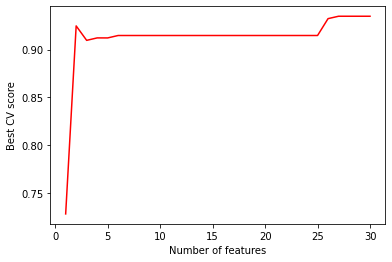

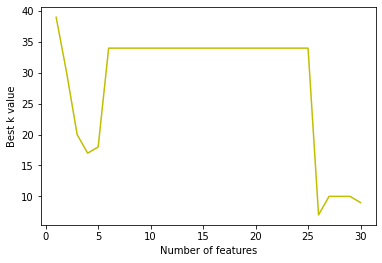

In [28]:
plt.figure("Number of features v/s mean cross-validation accuracy")
x_axis = [30] 
no_of_features = np.arange(len(least_imp_features_removed_op),0,-1)
x_axis = np.append(x_axis,no_of_features)
y_axis = max_cv_accuracy/100
y_axis = np.append(y_axis,best_mean_cvs_op)
plt.plot(x_axis,y_axis,color='r')
plt.xlabel("Number of features")
plt.ylabel("Best CV score")
plt.show()

plt.figure("Number of features v/s best k values")
x_axis1 = [30] 
no_of_features = np.arange(len(least_imp_features_removed_op),0,-1)
x_axis1 = np.append(x_axis1,no_of_features)
y_axis1 = index_value[0][0].copy()
y_axis1 = np.append(y_axis1,corresponding_hyperparameter)
plt.plot(x_axis1,y_axis1,color='y')
plt.xlabel("Number of features")
plt.ylabel("Best k value")
plt.show()


In [29]:
best_mean_cvs_op

array([0.9346519 , 0.9346519 , 0.9346519 , 0.9321519 , 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91458861,
       0.91458861, 0.91458861, 0.91458861, 0.91458861, 0.91205696,
       0.91208861, 0.90952532, 0.92458861, 0.72870253])

In [30]:
sorted(best_mean_cvs_op*100,reverse=True)[:5]

[93.46518987341771,
 93.46518987341771,
 93.46518987341771,
 93.21518987341773,
 92.45886075949367]

The number of essential features for classification: At least 5 features are required, as per the plot, if the number of features drop from 5, the cross validation accuracy drops drastically.  

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [31]:
### Part 4: Question 1 - Standardizing the training and test data set
X_train1 = X_train.copy()
X_test1 = X_test.copy()
Y_train1 = Y_train.copy()
f_data = dataset.feature_names

X_train_fit = scaler.fit(X_train1)

stdized_X_train = scaler.transform(X_train1)
stdized_X_test = scaler.transform(X_test1)

In [32]:
# Part 4: Question 2 - Calling Feature_Selector() function on the standardized data
dt.fit(stdized_X_train,Y_train1)               # Fitting the classifier on the training set

best_mean_cvs = []
least_imp_features_removed = []
corresponding_hyperparameter = []
f_data = dataset.feature_names

std_features_removed,std_best_cv_scores,std_k_values = Feature_selector(stdized_X_train,Y_train1)

In [33]:
std_best_cv_scores

array([0.96743671, 0.96496835, 0.96234177, 0.95984177, 0.95984177,
       0.95724684, 0.96234177, 0.95731013, 0.95731013, 0.95737342,
       0.95734177, 0.95987342, 0.95984177, 0.96234177, 0.95734177,
       0.95987342, 0.96740506, 0.95987342, 0.97496835, 0.96993671,
       0.96993671, 0.96993671, 0.95234177, 0.94468354, 0.9221519 ,
       0.91712025, 0.92462025, 0.91958861, 0.72373418])

In [34]:
std_index = np.where(std_best_cv_scores== std_best_cv_scores.max())
std_k_values[std_index]

array([8.])

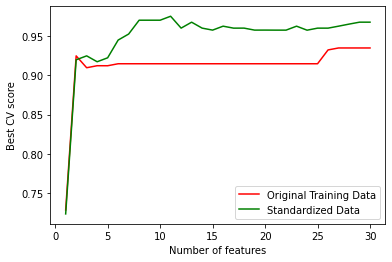

In [35]:
plt.figure("Number of features v/s mean cross-validation accuracy")
x_axis2 = [30] 
no_of_features = np.arange(len(least_imp_features_removed_op),0,-1)
x_axis2 = np.append(x_axis2,no_of_features)

y_axis2 = max_cv_accuracy/100
y_axis2 = np.append(y_axis2,best_mean_cvs_op)

y_axis3 = std_best_cv_scores[0]
y_axis3 = np.append(y_axis3,std_best_cv_scores)

plt.plot(x_axis,y_axis,color='r',label='Original Training Data')
plt.plot(x_axis,y_axis3,color='g',label='Standardized Data')
plt.xlabel("Number of features")
plt.ylabel("Best CV score")
plt.legend()
plt.show()


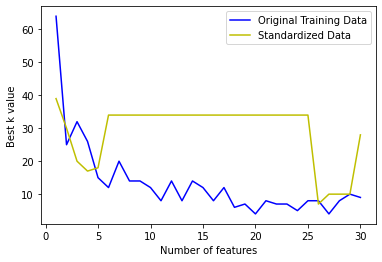

In [36]:
plt.figure("Number of features v/s k values ")
x_axis2 = [30] 
no_of_features = np.arange(len(least_imp_features_removed_op),0,-1)
x_axis2 = np.append(x_axis2,no_of_features)

y_axis_k = index_value[0][0].copy()
y_axis_k = np.append(y_axis_k,corresponding_hyperparameter)

std_best_k = corresponding_hyperparameter_op.max() 
index_std_k = np.where(corresponding_hyperparameter_op == std_best_k)  

std_y_axis_k = index_std_k[0][0].copy()
std_y_axis_k = np.append(std_y_axis_k,corresponding_hyperparameter_op)


plt.plot(x_axis,y_axis_k,color='b',label='Original Training Data')
plt.plot(x_axis,std_y_axis_k,color='y',label='Standardized Data')
plt.xlabel("Number of features")
plt.ylabel("Best k value")
plt.legend()
plt.show()


In [53]:
print(std_best_cv_scores*100)
print(corresponding_hyperparameter_op)
print(std_features_removed)

[96.74367089 96.49683544 96.23417722 95.98417722 95.98417722 95.72468354
 96.23417722 95.73101266 95.73101266 95.73734177 95.73417722 95.98734177
 95.98417722 96.23417722 95.73417722 95.98734177 96.74050633 95.98734177
 97.49683544 96.99367089 96.99367089 96.99367089 95.23417722 94.46835443
 92.21518987 91.71202532 92.46202532 91.95886076 72.37341772]
[10. 10. 10.  7. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34.
 34. 34. 34. 34. 34. 34. 18. 17. 20. 30. 39.]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry'

**Part 4: Question 3** 
After standardizing the data, the cross validation accuracy increases from 93.5% to 97.5%. 
  
(Please note that there may be exceptions every time the notebook is initiated & run).

1.   It is evident from the above plot ("Best CV value v/s Number of Features") that as the features decrease, the cross validation accuracy also decreases.For number of features greater than 25, the mean cv accuracy is the highest i.e., the accuracy increases when there are more than 5 features. In addition, the standardized data gives better cross validation score when compared to non-standardized data.

2. As per the second graph,("Standardized data of k v/s Number of Features"), the k value is high for large number of features (shows positive trend). The higher the number of features taken into consideration, k values decreases considerably. Hence, more features help for convenient predictions using less k values. While comparing the standardized dataset with unstandardized data, higher number of features are required after standardizing the training set.

3. Worst fractal dimension is the least important feature from the dataset.
  The important features which contribute to cv score are : -'mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture'

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [37]:
X_train4 = X_train.copy()
Y_train_DTC = Y_train.copy()
X_test4 = X_test.copy()

X_train_fit2 = scaler.fit(X_train4)

std_X_train_DTC = scaler.transform(X_train4)
std_X_test_DTC = scaler.transform(X_test4)

In [38]:
### YOUR CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTCmodel = DecisionTreeClassifier(random_state=50)

parameter = {"max_depth" : range(1,12), "min_samples_split" : range(1,15)}
grid = GridSearchCV(DTCmodel,param_grid = parameter,cv=5)

grid.fit(std_X_train_DTC,Y_train_DTC)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 770.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'max_depth': range(1, 12),
                         'min_samples_split': range(1, 15)})

In [39]:
mean_cvs_DTC = grid.best_score_ 
print(mean_cvs_DTC) 

0.9321518987341773


In [40]:
grid.best_params_

{'max_depth': 4, 'min_samples_split': 8}

In [41]:
DTC_scores = cross_validate(DTCmodel,std_X_train_DTC,Y_train_DTC,cv=5,return_train_score=True)

In [55]:
print("The mean cross validation score for KNN classifier using non-standardized training data using all features is \n",(max_cv_accuracy),"%")
print("The mean cross validation score for KNN classifier using standardized training data using all features is \n",((std_best_cv_scores.max()*100)),"%")
print("The mean cross validation score for Decision Tree Classifier using standardized training data using all features is \n",(mean_cvs_DTC*100),"%")

The mean cross validation score for KNN classifier using non-standardized training data using all features is 
 93.46518987341771 %
The mean cross validation score for KNN classifier using standardized training data using all features is 
 97.49683544303798 %
The mean cross validation score for Decision Tree Classifier using standardized training data using all features is 
 93.21518987341773 %


As evident from the cell above, the KNN model gives a better accuracy (when considering all the features) in comparison to Decision Tree Classifier.

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [43]:
### YOUR CODE HERE ###
Y_test_final = Y_test.copy()
knn_test = neighbors.KNeighborsClassifier(n_neighbors=8)
knn_test.fit(stdized_X_train,Y_train)

accuracy = accuracy_score(Y_test,knn_test.predict(stdized_X_test))
print('Test set accuracy is',accuracy*100,'%')

Test set accuracy is 95.32163742690058 %


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/